# Pymaceuticals: An Analysis of Drug Impact to Squamous Cell Carcinoma (SCC) Treatments using Pandas, Matplotlib
UCIRV201902DATA3<br>
Submitted by K. Harrison<br>
26-MAR-2019
___

### Background
Animal study data was provided to determine the efficacy of 11 drugs for potential treatments to squamous cell carcinoma (SCC).  In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Set path of files to load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df = pd.merge(mouse_df, clinical_df, on='Mouse ID')

### Control Panel
Select list of drugs to be analyzed and paste into "drug_list" variable.  Graphical formatting is controlled in the colors and markers lists.

Lists of Drugs: 'Stelasyn', 'Propriva', 'Naftisol', 'Ketapril', 'Capomulin','Infubinol', 'Ceftamin', 'Zoniferol', 'Ramicane', 'Placebo'

In [2]:
drug_list = ['Propriva', 'Ketapril','Infubinol', 'Ceftamin', 'Placebo', 'Capomulin', 'Ramicane']
colors = ['red', 'blue', 'green', 'black', 'orange', 'purple', 'grey', 'brown', 'c', 'm']
markers= ['o', '^', 's', 'd', 'o', '.', '<', '>','8', 'p']

___
## Tumor Response to Treatment

#### Observations
It was observed that only two of the drugs (Capomuli, Ramicane) were shown to actively decrease the size of the tumor over the 45 day trial period.  Specifically, Ramicane has the most promise at reducing the SCC, showing an average tumor size decrease of 10.0 mm^3 over the 45 day period.  Capomulin was close behind with an average tumor size decrease of 8.8 mm^3 over the trial.

Taking the placebo as a control group (Average change of +23.1 mm^3), it was observed that three of the drugs (Stelasyn, Naftisol, Ketapril) appeared to perform worse than the control group, suggesting that they might actively speed up the growth of the tumor size.  Ketapril was the worst performing drug, increasing the tumor size an average of 25.7 mm^3 over the study.  Four of the drugs (Ceftamin, Infubinol, Zoniferol, Propriva) performed slightly better than the placebo, but still caused an increase in the tumor size during the study.

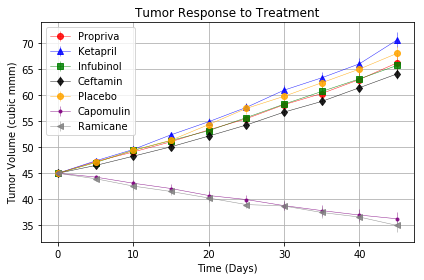

In [3]:
#Create and group data frame for calculating the tumor size mean
drug_df_mean = df.groupby(["Drug", 'Timepoint']).mean()
drug_df_mean = drug_df_mean.drop(columns="Metastatic Sites")
drug_df_mean = drug_df_mean.reset_index()

#Caluclate the standard error of the mean for the tumor size
drug_df_sem = df.groupby(["Drug", 'Timepoint']).sem()
drug_df_sem = drug_df_sem.drop(columns=["Metastatic Sites", "Mouse ID"])
drug_df_sem = drug_df_sem.reset_index()

#Create pivot chart for mean, standard error for tumor volume
drug_sem_pivot = drug_df_sem.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
drug_mean_pivot = drug_df_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

#create x-axis and x-ticks
x_axis = np.arange(0,50,5)
ticks = np.arange(0,50,10)

#graph data using formatting assigned in the control panel
counter = 0
for drug in drug_list:
    if drug in drug_list:
        plt.errorbar(x_axis, drug_mean_pivot[drug], yerr=drug_sem_pivot[drug], color=colors[counter],
                     marker=markers[counter], alpha=.85, linewidth=.5)
        plt.legend(loc='best')
        counter += 1

#Plot formatting
plt.xticks(ticks)
plt.legend(loc='best')
plt.grid()
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (cubic mmm)')

#Show plot
plt.tight_layout()
plt.savefig("figures/TumorResponse.png")
plt.show()

___
## Metastatic Response to Treatment

#### Observations
Aligned with the tumor growth performance, Ramicane and then Capomulin were the best performing drugs at slowing the metastisis of the cancerous cells over the 45 day trial period.  Of the 11 active drugs, Ketapril was the only one to perform worse than the control group (an average of 3.4 sites, compared to the control of 3.3 sites).

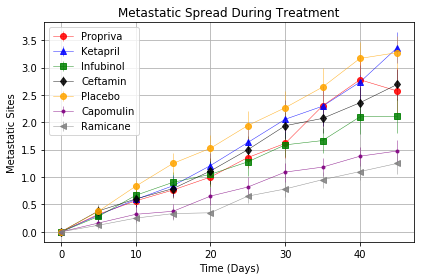

In [4]:
#Create and group data frame for calculating the metastatic response mean
meta_df_mean = df.groupby(["Drug", 'Timepoint']).mean()
meta_df_mean = meta_df_mean.drop(columns="Tumor Volume (mm3)")
meta_df_mean = meta_df_mean.reset_index()

#Caluclate the standard error of the mean for the metastatic response
meta_df_sem = df.groupby(["Drug", 'Timepoint']).sem()
meta_df_sem = meta_df_sem.drop(columns=["Tumor Volume (mm3)", "Mouse ID"])
meta_df_sem = meta_df_sem.reset_index()

#Create pivot chart for mean, standard error for metastatic response
meta_sem_pivot = meta_df_sem.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
meta_mean_pivot = meta_df_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

#graph data using formatting assigned in the control panel
counter = 0
for drug in drug_list:
    if drug in drug_list:
        plt.errorbar(x_axis, meta_mean_pivot[drug], yerr=meta_sem_pivot[drug], color=colors[counter],
                     marker=markers[counter], alpha=.85, linewidth=.5)
        plt.legend(loc='best')
        counter += 1

#Plot formatting
plt.xticks(ticks)
plt.legend(loc='best')
plt.grid()
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')

#show plot
plt.tight_layout()
plt.savefig("figures/MetastaticResponse.png")
plt.show()

___
## Survival Rates

#### Observations
While Ramacine has outperformed Capomulin in the previous metrics (tumor growth, metastatic sites), Capomulin has the highest surival rate at the end of the 45 day trial of all of the drugs (84%), followed by Ramicane at 80%.  Three additional drugs outperformed the survival rate of the control group (44%) and had a surival rate higher than 50%; Zoniferol (56%), Naftisol (52%) and Ceftamin (52%).  Ketapril, which had the worst performance based on the previous metrics, was not the worst-performing drug interms of survival rate.  Four drugs had a survival rate of less than 50%, including Ketapril (44%), Stelasyn (42%), Infubinol (36%), Propriva (27%).

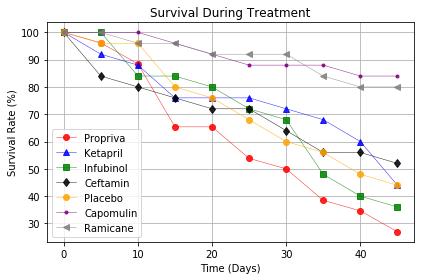

In [5]:
#Create and group data frame for calculating the mice survival count
mouse_df_count = df.groupby(["Drug", 'Timepoint']).count()
mouse_df_count = mouse_df_count.drop(columns=['Tumor Volume (mm3)', 'Metastatic Sites'])
mouse_df_count = mouse_df_count.reset_index()

#Create pivot chart for count of the mouse survival rate
mouse_count_pivot = mouse_df_count.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
mouse_count_pivot_pct = mouse_count_pivot / mouse_count_pivot.iloc[0]*100

#graph data using formatting assigned in the control panel
counter = 0
for drug in drug_list:
    if drug in drug_list:
        plt.plot(x_axis, mouse_count_pivot_pct[drug], color=colors[counter],
                     marker=markers[counter], alpha=.85, linewidth=.5)
        plt.legend(loc='best')
        counter += 1
    
#Plot formatting
plt.xticks(ticks)
plt.legend(loc='best')
plt.grid()
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')

#Show plot
plt.tight_layout()
plt.savefig("figures/SurvivalRate.png")
plt.show()

___
## Summary Bar Graph

#### Observations
Of the drugs studied, Capomulin and Ramicane were the only two to show positive against the treatment of SCC in mice.  The other 9 drugs performed similarly to the control group (placebo) and should not be evaluated further.

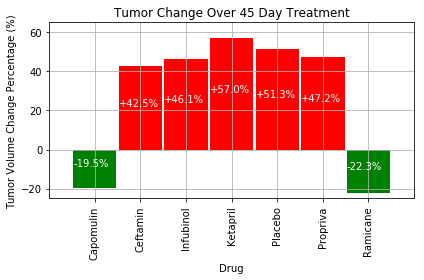

In [6]:
#Calculate the tumor change rate percentage
tumor_change = (drug_mean_pivot.loc[45] - drug_mean_pivot.loc[0]) / drug_mean_pivot.loc[0] * 100
#create list of the tumor change percentages based on the drug list defined in the control panel
tumor_list = tumor_change[tumor_change.index.isin(drug_list)]

#bar graph formatting
color = []
width=.95

#conditional color formatting for bar graph based positive or negative tumor response
for drug in tumor_list:
    if drug < 0:
        color.append('green')
    else:
        color.append('red')
        
#create bar graph        
ax = tumor_list.plot(kind='bar', color=color, width=width)
        
#bar graph formatting
x_offset = -(width/2)
y_offset = 1
ax.set_xlim(-1, len(drug_list))
ax.set_ylim(-25, 65)
plt.yticks(np.arange(-20, 70, 20))
ax.grid()
plt.ylabel('Tumor Volume Change Percentage (%)')
plt.title('Tumor Change Over 45 Day Treatment')

#create bar graph labels
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.1f}%".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1/2 + y_offset), color='white')

#Show bar graph
plt.tight_layout()
plt.savefig("figures/SummaryGraph.png")
plt.show()

___
## Conclusions & Recommendations
It is recommended that Capomulin and Ramicane be studied further to determine their efficacy in reducing tumor volumes, metastic sites, and overall survival rates.  It is recommended that Ketapril and Propriva be discarded for any further consideration in the treatment of SCC.